### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [7]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization, LSTM, GRU
import tensorflow

# if you have installed a different version, replace 'r2.6'  with your version in links provided below
print(tensorflow.__version__)

2.9.0


In [8]:
# load imdb dataset
# links to dataset
# original dataset: https://ai.stanford.edu/~amaas/data/sentiment/
# version in tensorflow: https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/datasets/imdb

# select your vocabulary size
vocabularySize = 5000
# load data (it is already pre-processed)
# optional: add other pre.processing steps like stopword removal
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabularySize)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xTrain), len(xTest)))

Loaded dataset with 25000 training samples, 25000 test samples


In [9]:
# select maximum number of words as input lengt
# pad or truncated (this is done automatically) your data
maxWords = 500
xTrain = sequence.pad_sequences(xTrain, maxlen=maxWords)
xTest = sequence.pad_sequences(xTest, maxlen=maxWords)

In [72]:
## setup the neural network architecture
model=Sequential()

embeddingSize = 4
model.add(Embedding(vocabularySize, embeddingSize, embeddings_initializer='HeNormal', input_length=maxWords))

# add layers: 
# model.add(SimpleRNN(8))
# model.add(LSTM(4))
model.add(GRU(4))
model.add(LayerNormalization())

# add layer for output
model.add(Dense(1, activation='sigmoid'))

# print model and check number of parameters
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 4)            20000     
                                                                 
 gru_7 (GRU)                 (None, 4)                 120       
                                                                 
 layer_normalization_10 (Lay  (None, 4)                8         
 erNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 20,133
Trainable params: 20,133
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
# set parameters for network training
batchSize = 64
numEpochs = 10

# train your model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
xValid, yValid = xTrain[:batchSize], yTrain[:batchSize]
xTrain2, yTrain2 = xTrain[batchSize:], yTrain[batchSize:]
hist = model.fit(xTrain2, yTrain2, validation_data=(xValid, yValid), batch_size=batchSize, epochs=numEpochs, use_multiprocessing=True)

# check result
scores = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/10
390/390 [==============================] - 40s 97ms/step - loss: 0.6119 - accuracy: 0.6501 - val_loss: 0.5138 - val_accuracy: 0.7500
Epoch 2/10
390/390 [==============================] - 38s 98ms/step - loss: 0.3769 - accuracy: 0.8347 - val_loss: 0.2197 - val_accuracy: 0.9375
Epoch 3/10
390/390 [==============================] - 38s 98ms/step - loss: 0.2666 - accuracy: 0.8951 - val_loss: 0.1858 - val_accuracy: 0.9531
Epoch 4/10
390/390 [==============================] - 38s 99ms/step - loss: 0.2292 - accuracy: 0.9136 - val_loss: 0.1948 - val_accuracy: 0.9062
Epoch 5/10
390/390 [==============================] - 38s 96ms/step - loss: 0.1995 - accuracy: 0.9272 - val_loss: 0.2103 - val_accuracy: 0.8906
Epoch 6/10
390/390 [==============================] - 38s 97ms/step - loss: 0.1794 - accuracy: 0.9358 - val_loss: 0.1748 - val_accuracy: 0.9219
Epoch 7/10
390/390 [==============================] - 38s 98ms/step - loss: 0.1595 - accuracy: 0.9449 - val_loss: 0.2334 - val_accuracy:

In [74]:
model.save('FinalResult.h5')

In [10]:
from keras.models import load_model

# Load the Model
model = load_model('FinalResult.h5')

In [11]:
# Evaluate the Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, x_val, y_val):
    LossAndAccuracy = model.evaluate(x_val, y_val, verbose=0)
    print('Loss: {0:5.3f} - Accuracy: {1:5.3f}'.format(LossAndAccuracy[0], LossAndAccuracy[1]))
    
def show_evaluate_model(model, x_val, y_val):
    #Confution Matrix
    Y_Predict = model.predict(x_val, verbose=0)
    y_pred = Y_Predict > 0.5
    y_true = np.zeros(len(y_pred))
    for idx in range(len(y_true)):
        y_true[idx] = y_val[idx]

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.xticks(rotation=90)
    plt.show()

Loss: 0.44706839323043823 - Accuracy: 0.8558400273323059


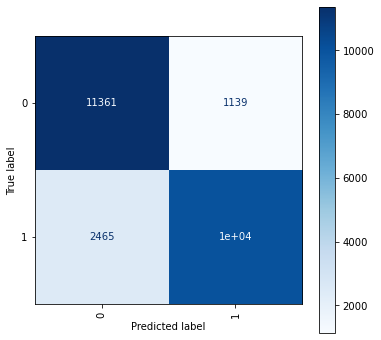

In [12]:
evaluate_model(model, xTest, yTest)
show_evaluate_model(model, xTest, yTest)